## AirBNB - Lodging Configuration and Host Behavior
### Capstone - Thinkful Prep Course

#### Author: Will Becerra
#### Email: willbecerra@yahoo.com

#### Mentor: Yunus Bulut
#### Date: 2018/03

In [12]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

## Introduction

Airbnb operates an online marketplace and hospitality service for people to lease or rent short-term lodging including holiday cottages, apartments, homestays, hostel beds, or hotel rooms.  It was founded in 2008 and has since had a hand in over 260 million check-ins.

I chose this data set because my fiance manages AirBNB properties, and we want to find out what the best strategies are for AirBNB property managers, as she takes on new listings to manage.

Summary: I found that the majority of rentals in DC in 2015 were 1 bedrooms (70%), and identified the average price for each room configuration.  I also found that while there is not a direct correlation between host response rate and review rating, superhosts have more than 2 times the number of views for their properties as regular hosts.

## Data

Kaggle data set - AirBNB information from Insider AirBNB:  Adding Data to the Debate.  http://insideairbnb.com

The original data set had 3,723 entries and 92 columns and covered 4 states - DC, MD, NY, VA.  All but 28 entries were from DC, so I chose to focus the analysis on DC.  The data was last scraped in 2015.

The data includes broad types of variables related to geographic location, lodging configuration and host interaction.  My goal was to analyze the variables associated with configuration and pricing, along with data related to the host and their interactions, in order to analyze how pricing is related to the configuration type and the impact that host behavior can have.

The descriptive statistics of variables I'll be using will include mean, mode and standard deviation of bedrooms, pricing and ratings.

In [13]:
df_root = pd.read_csv('listings.csv')

First, created a DataFrame that included only DC listings.

In [14]:
df = df_root.loc[df_root['state'] == 'DC'].reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 92 columns):
id                                  3696 non-null int64
listing_url                         3696 non-null object
scrape_id                           3696 non-null float64
last_scraped                        3696 non-null object
name                                3696 non-null object
summary                             3430 non-null object
space                               2961 non-null object
description                         3695 non-null object
experiences_offered                 3696 non-null object
neighborhood_overview               2457 non-null object
notes                               1702 non-null object
transit                             2574 non-null object
thumbnail_url                       3663 non-null object
medium_url                          3663 non-null object
picture_url                         3696 non-null object
xl_picture_url                      36

In [16]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7087327,https://www.airbnb.com/rooms/7087327,2.020000e+13,10/3/2015,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,Professional pictures coming soon! Welcome to ...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,18,NaN
1,975833,https://www.airbnb.com/rooms/975833,2.020000e+13,10/3/2015,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,Beautifully renovated Capitol Hill townhouse. ...,none,NaN,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,2.11
2,8409022,https://www.airbnb.com/rooms/8409022,2.020000e+13,10/3/2015,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,Prime location right on the Potomac River in W...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
3,8634774,https://www.airbnb.com/rooms/8634774,2.020000e+13,10/3/2015,Exclusive Catamaran Houseboat,DC Water living at its best! Million dollar v...,Large stable catamaran that boasts one of the ...,DC Water living at its best! Million dollar v...,none,Safe area with gates and next to secure milita...,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
4,8498095,https://www.airbnb.com/rooms/8498095,2.020000e+13,10/3/2015,"Cozy DC Condo, Close to Metro!","Cozy two-bedroom, two full bath condo in the h...",NaN,"Cozy two-bedroom, two full bath condo in the h...",none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN


As you can see, data includes information related to geographic location, lodging configuration and host interaction.  

I analyzed the data to see how pricing is related to the configuration type and how host behavior affects ratings. 

I looked at the variables: bedrooms, price, host_listings_count, host_response_rate, number_of_reviews, and review_scores_rating.

## Analytic Questions

### Configuration / Pricing
1. What is the most common lodging configuration?
2. What is the average price per configuration?
3. Is there a relationship between price and the number of items listed as amenities?

### Hosts
4.	What kind of relationships can I find between variables associated with hosting and rating?
5.	What is the relationship between host response rate and review rating?
6.	What is the impact of being a Superhost?

These questions may shed light on strategies for new listings, such as what price a host should charge for a new listing, and what kinds of actions a host can take to improve ratings.


### Data Cleansing

First, I identified the missing data and then modify empty values for the numerical columns that I'll be using.  I started  off by looking at which variables are missing more than 15% of their values.

In [17]:
df3 = df.isnull().sum() > 560
df3[df3[:]== True]

space                           True
neighborhood_overview           True
notes                           True
transit                         True
host_about                      True
host_acceptance_rate            True
neighbourhood_group_cleansed    True
square_feet                     True
weekly_price                    True
monthly_price                   True
security_deposit                True
cleaning_fee                    True
first_review                    True
last_review                     True
review_scores_rating            True
review_scores_accuracy          True
review_scores_cleanliness       True
review_scores_checkin           True
review_scores_communication     True
review_scores_location          True
review_scores_value             True
license                         True
reviews_per_month               True
dtype: bool

For this study, variables of interest include bedrooms, price, host_listings_count, host_response_rate, number_of_reviews, and review_scores_rating.  These variables contain numerical values.

In [18]:
print('empty rows for bedrooms = ',df.isnull().bedrooms.sum())
print('empty rows for price = ',df.isnull().price.sum())
print('empty rows for host_listings_count = ',df.isnull().host_listings_count.sum())
print('empty rows for host_response_rate = ',df.isnull().host_response_rate.sum())
print('empty rows for number_of_reviews = ',df.isnull().number_of_reviews.sum())
print('empty rows for review_scores_rating = ',df.isnull().review_scores_rating.sum())

empty rows for bedrooms =  21
empty rows for price =  0
empty rows for host_listings_count =  0
empty rows for host_response_rate =  427
empty rows for number_of_reviews =  0
empty rows for review_scores_rating =  854


Next, I replaced empty (NaN) values with the applicable mode or mean.

In [19]:
df['bedrooms'].fillna(value = statistics.mode(df['bedrooms']), inplace=True)

In [20]:
df['host_response_rate'].fillna(value = statistics.mode(df['host_response_rate']), inplace=True)

There were 854 empty values for review scores rating.  Rather than replace these, I dropped those rows from the DataFrame.

In [22]:
df2 = df.dropna(subset=['review_scores_rating'])
df = df2

Next, I modified values that were strings, so they could be analyzed numerically.

The values of price, security deposit, cleaning fee, and extra people have '$' and ',' symbols. I removed these symbols and made the values into floats.

The values of host_response_rate, host_acceptance_rate have '%' sign. I made these values into floats as well.

In [23]:
df['price'] = (df['price'].replace( '[\$,)]','', regex=True ).astype(float))
df['security_deposit'] = (df['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float))
df['cleaning_fee'] = (df['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float))
df['extra_people'] = (df['extra_people'].replace( '[\$,)]','', regex=True ).astype(float))

df['host_response_rate'] = (df['host_response_rate'].replace( '[\%,)]','', regex=True ).astype(float))
df['host_acceptance_rate'] = (df['host_acceptance_rate'].replace( '[\%,)]','', regex=True ).astype(float))

## Data Analysis

### * Section 1 - Lodging Configuration & Pricing

### Question #1 - What's the most common lodging configuration, as far as number of rooms?

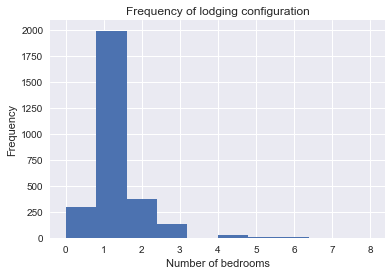

In [24]:
plt.hist(df['bedrooms'])
plt.title('Frequency of lodging configuration')
plt.xlabel('Number of bedrooms')
plt.ylabel('Frequency')
plt.show()

In [25]:
df['bedrooms'].value_counts(normalize=True)

1.0    0.701267
2.0    0.131949
0.0    0.104856
3.0    0.046446
4.0    0.009852
5.0    0.003871
6.0    0.001407
8.0    0.000352
Name: bedrooms, dtype: float64

The most common configurations are 1 bedroom (70%) followed by 2 bedrooms (13%).

### Question #2 - What's the average price lodging configuraton (number of rooms)?

In [35]:
bed_grouped = pd.DataFrame(df.groupby(['bedrooms']).mean()['price'], columns = ['price'])
bed_grouped['std'] = df.groupby(['bedrooms']).std()['price']
bed_grouped.columns = ['average price', 'standard deviation']
bed_grouped

,average price,standard deviation
bedrooms,,
0.0,115.919463,37.348485
1.0,108.073256,45.620099
2.0,205.261333,79.050928
3.0,290.750000,130.648025
4.0,337.214286,171.133121
5.0,387.000000,286.023426
6.0,461.000000,190.999127
8.0,1200.000000,NaN


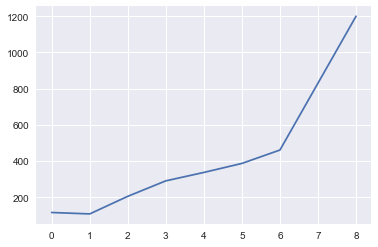

In [36]:
plt.plot(bed_grouped['average price'])

0 bedrooms denotes a studio apartment.  

1 bedrooms average a price of \$108 per night with a standard deviation of $45.

The price increases linearly with the number of bedrooms, but once we get to 6 bedrooms, the prices increase steeply.
This may tell us that there is less price sensitivity as the accomodations reach a certain size or are more luxurious.

### Question # 3 - Is there a relationship between price and the number of items listed as amenities?

In [44]:
# df['number_of_amenities'] = df.amenities.apply(lambda x: len(x))
df['number_of_amenities'] = df.amenities.str.count(',') + 1

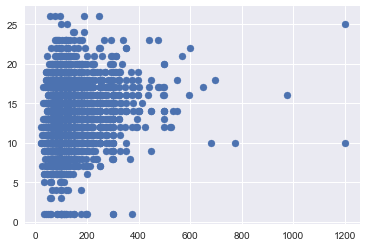

In [45]:
plt.scatter(df['price'], df['number_of_amenities'])
plt.show()

The scatter plot shows that there is no direct relationship between number of amenities listed and price.

### * Section 2 - Hosting

### Question #4 - What kind of relationships can I find between variables associated to hosting and rating?  

Here, I created a new DataFrame that contains only variables that have numerical values.  

In [47]:
features = df[['host_response_rate', 'host_acceptance_rate', 'host_listings_count',  'host_total_listings_count', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 
                     'minimum_nights', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy']]

In [48]:
features.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy
1,90.0,100.0,1,1,6,3.0,3.0,3.0,350.0,NaN,100.0,1,0.0,2,65,94.0,10.0
5,100.0,100.0,1,1,1,1.0,1.0,1.0,149.0,NaN,NaN,1,99.0,3,46,100.0,10.0
6,100.0,100.0,2,2,4,1.0,1.0,2.0,150.0,100.0,30.0,2,20.0,2,84,99.0,10.0
7,53.0,69.0,1,1,4,1.5,1.0,1.0,175.0,NaN,25.0,2,25.0,1,25,91.0,10.0
8,100.0,100.0,1,1,3,1.0,2.0,2.0,239.0,NaN,50.0,1,0.0,5,4,100.0,9.0


In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2842 entries, 1 to 3695
Data columns (total 17 columns):
host_response_rate           2842 non-null float64
host_acceptance_rate         2586 non-null float64
host_listings_count          2842 non-null int64
host_total_listings_count    2842 non-null int64
accommodates                 2842 non-null int64
bathrooms                    2827 non-null float64
bedrooms                     2842 non-null float64
beds                         2838 non-null float64
price                        2842 non-null float64
security_deposit             1150 non-null float64
cleaning_fee                 1888 non-null float64
guests_included              2842 non-null int64
extra_people                 2842 non-null float64
minimum_nights               2842 non-null int64
number_of_reviews            2842 non-null int64
review_scores_rating         2842 non-null float64
review_scores_accuracy       2835 non-null float64
dtypes: float64(11), int64(6)
memory u

I used a Pearson Correlation Chart to show how the multiple variables are related to each other.  
I filled in the remaining missing values with the mean for each variable.

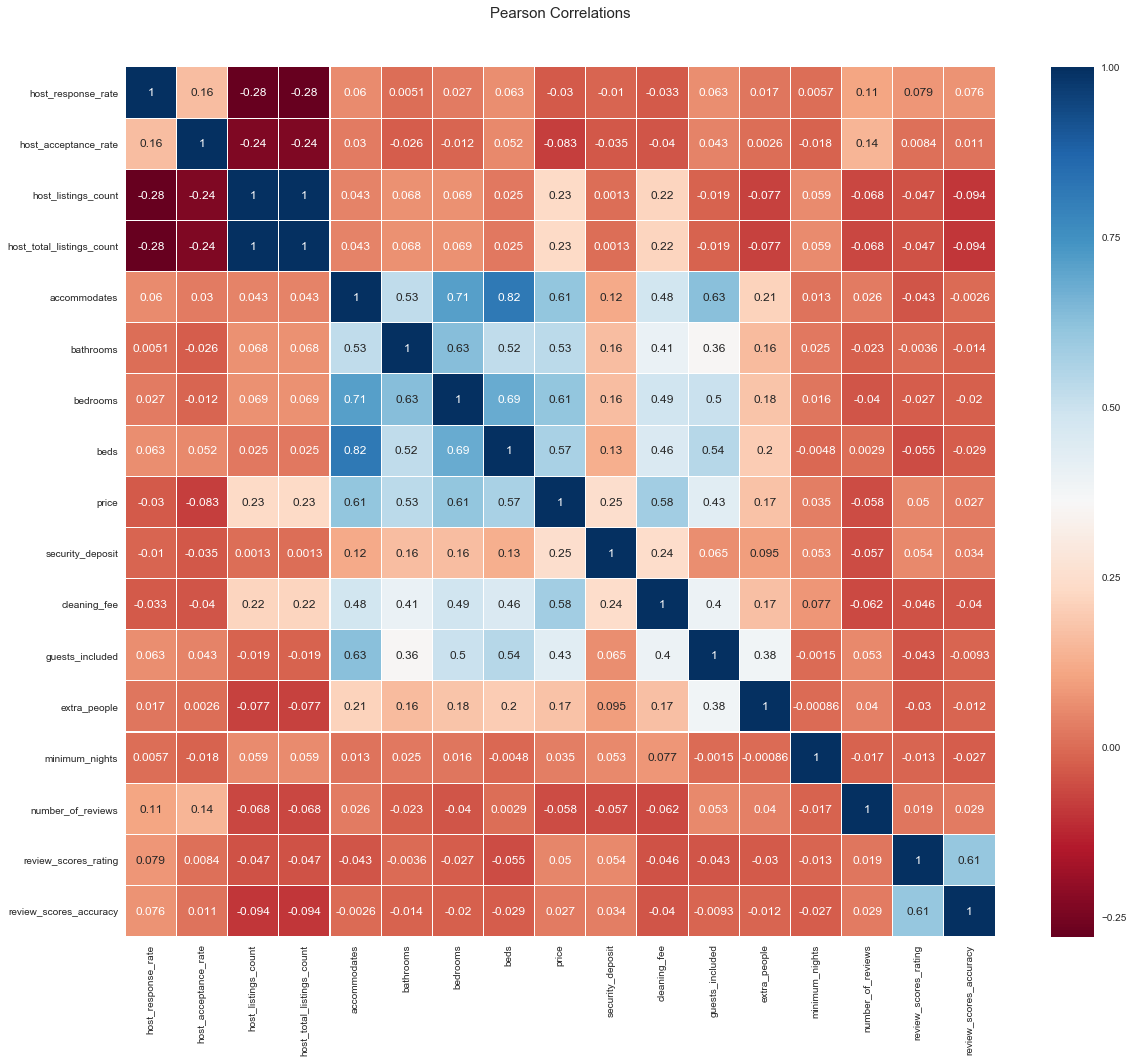

In [53]:
features.fillna(value=np.mean(features), inplace=True)
corr_df = features
colormap = plt.cm.RdBu
plt.figure(figsize=(20,16))
plt.title('Pearson Correlations', y=1.05, size=15)
sns.heatmap(features.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

The Pearson Correlation Chart does not show strong interrelatedness of many factors, as I was looking for variables that could be influenced by the host.
Next, I looked at review ratings.  I also looked more deeply at the slight correlation between host response rate and number of reviews.

### Question #5 -  What is the relationship between host response rate and review rating?

In [54]:
features['host_response_rate'].corr(features['review_scores_rating'])

0.0790990943564686

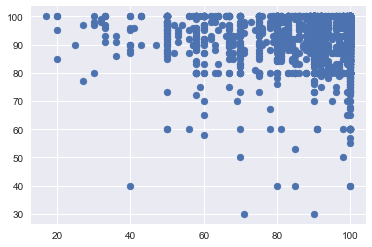

In [55]:
plt.scatter(features['host_response_rate'], features['review_scores_rating'])
plt.show()

The correlation calculation and scatter plot tell me there is a weak relationship between 'host response rate' and 'review scores rating'.

### Question # 6 - What is the impact of being a Superhost?

The slight correlation between host response rate and number of reviews caused me to explore the impact of a listing being managed by a Superhost.

'Superhost' is a designation for Airbnb hosts that meet or exceed the following criteria: 
- have an account in good standing
- have hosted 10 trips within the last year
- maintain a 90% + response rate to guests
- have 80% 5 star reviews

In this section, I looked at the statistics related to being a Superhost.

In [58]:
pd.value_counts(df['host_is_superhost'])

f    2504
t     338
Name: host_is_superhost, dtype: int64

In [59]:
(len(df[df['host_is_superhost']=='t']) / len(df['host_is_superhost']))*100

11.893033075299085

In [60]:
df.groupby('host_is_superhost')['review_scores_rating'].mean()

host_is_superhost
f    92.938099
t    97.109467
Name: review_scores_rating, dtype: float64

In [61]:
df.groupby('host_is_superhost')['number_of_reviews'].mean()

host_is_superhost
f    17.383786
t    39.210059
Name: number_of_reviews, dtype: float64

In [62]:
df.groupby('host_is_superhost')['host_listings_count'].mean()


host_is_superhost
f    13.077077
t     1.792899
Name: host_listings_count, dtype: float64

Analysis of Superhosts:
Only 11.9% of hosts reach the level of Superhost.
Regular hosts average 92.9 % rating while a Superhost averages 97.1% rating.
Superhosts have more than double the number of reviews for their listings than regular hosts.
Superhosts, on average, manage much fewer properties than regular hosts.

## Conclusion

The most common configuration for AirBNB properties in DC in 2015 was 1 bedrooms rentals and pricing increased sharply once a lodging reached 6 bedrooms.  This points to renters who are looking for luxury accomodations or with a large number of people in their party may be less sensitive to higher prices.

While there is not a direct correlation between host response rate and review rating, there is a marked difference between  how the listings of regular hosts and Superhosts rate on reviews.  Listings of Superhosts have a higher average rating review score (97.1%) than regular hosts (92.9%).  Also, Superhosts have more than 2 times the number of reviews for their properties as regular hosts (39 reviews to 17 reviews).  So, if renters see listings with a large number of reviews as more attractive, having a Superhost manage your property could increase the chances of your place being booked.  

## Further Research

The data I acquired was useful for descriptive analysis, but I would like to find a data set that includes number or rate of bookings, in order to see how the variables relate to increasing the chances of one's listing being booked.